In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import sys
import matplotlib
import imblearn
from sklearn.manifold import TSNE

print("Python version:", sys.version)
print("matplotlib version:", matplotlib.__version__)
print("imblearn version:", imblearn.__version__)

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
matplotlib version: 3.7.1
imblearn version: 0.10.1


# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
p = 'broadleafcommerce'
data = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/subtract-{p}-method.csv")
data

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,07287d3f6f5f368b9b6a815f3926257e42845f71,org.broadleafcommerce.openadmin.security.Broad...,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,169f0bbfec129b2b2db37bf8d20ae4c6d373f6c0,org.broadleafcommerce.core.search.service.solr...,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,169f0bbfec129b2b2db37bf8d20ae4c6d373f6c0,org.broadleafcommerce.core.search.service.solr...,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1e8b29ba6d27d72811406cce7db53ed3fa903475,org.broadleafcommerce.core.web.checkout.stage....,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1e8b29ba6d27d72811406cce7db53ed3fa903475,org.broadleafcommerce.core.web.checkout.stage....,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,0c21b421c1d9c38444c820eea84cad34979e3b37,org.broadleafcommerce.common.media.domain.Medi...,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,0
4705,beb23ce063b9f0f91520b023d0eee1fd1a2113ba,org.broadleafcommerce.core.payment.domain.Cred...,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,1
4706,0c21b421c1d9c38444c820eea84cad34979e3b37,org.broadleafcommerce.core.payment.domain.Cred...,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,0
4707,beb23ce063b9f0f91520b023d0eee1fd1a2113ba,org.broadleafcommerce.common.email.domain.Emai...,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.columns

Index(['Hash', 'LongName', 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC',
       'LLDC', 'HCPL', 'HDIF', 'HEFF', 'HNDB', 'HPL', 'HPV', 'HTRP', 'HVOL',
       'MI', 'MIMS', 'MISEI', 'MISM', 'McCC', 'NL', 'NLE', 'NII', 'NOI', 'CD',
       'CLOC', 'DLOC', 'TCD', 'TCLOC', 'LLOC', 'LOC', 'NOS', 'NUMPAR', 'TLLOC',
       'TLOC', 'TNOS', 'WarningBlocker', 'WarningCritical', 'WarningInfo',
       'WarningMajor', 'WarningMinor', 'Android Rules', 'Basic Rules',
       'Brace Rules', 'Clone Implementation Rules', 'Code Size Rules',
       'Comment Rules', 'Controversial Rules', 'Coupling Rules',
       'Design Rules', 'Empty Code Rules', 'Finalizer Rules',
       'Import Statement Rules', 'J2EE Rules', 'JUnit Rules',
       'Jakarta Commons Logging Rules', 'Java Logging Rules', 'JavaBean Rules',
       'MigratingToJUnit4 Rules', 'Migration Rules', 'Migration13 Rules',
       'Migration14 Rules', 'Migration15 Rules', 'Naming Rules',
       'Optimization Rules', 'Security Code Guideline Rules',
  

In [ ]:
data['Hash']

0       07287d3f6f5f368b9b6a815f3926257e42845f71
1       169f0bbfec129b2b2db37bf8d20ae4c6d373f6c0
2       169f0bbfec129b2b2db37bf8d20ae4c6d373f6c0
3       1e8b29ba6d27d72811406cce7db53ed3fa903475
4       1e8b29ba6d27d72811406cce7db53ed3fa903475
                          ...                   
4704    0c21b421c1d9c38444c820eea84cad34979e3b37
4705    beb23ce063b9f0f91520b023d0eee1fd1a2113ba
4706    0c21b421c1d9c38444c820eea84cad34979e3b37
4707    beb23ce063b9f0f91520b023d0eee1fd1a2113ba
4708    0c21b421c1d9c38444c820eea84cad34979e3b37
Name: Hash, Length: 4709, dtype: object

In [ ]:
data['LongName']

0       org.broadleafcommerce.openadmin.security.Broad...
1       org.broadleafcommerce.core.search.service.solr...
2       org.broadleafcommerce.core.search.service.solr...
3       org.broadleafcommerce.core.web.checkout.stage....
4       org.broadleafcommerce.core.web.checkout.stage....
                              ...                        
4704    org.broadleafcommerce.common.media.domain.Medi...
4705    org.broadleafcommerce.core.payment.domain.Cred...
4706    org.broadleafcommerce.core.payment.domain.Cred...
4707    org.broadleafcommerce.common.email.domain.Emai...
4708    org.broadleafcommerce.common.email.domain.Emai...
Name: LongName, Length: 4709, dtype: object

### Applying LabelEncoder on the 'Hash' and 'LongName' columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in data[['Hash','LongName']].columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
data.head(2)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,20,2005,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,1461,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Removing constant features

In [ ]:
maxMin = data.iloc[:, 2:].max() - data.iloc[:, 2:].min()

In [ ]:
zeroMaxMin = maxMin[maxMin==0]

In [ ]:
zeroMaxMincolumns = [item for item in zeroMaxMin.index]
zeroMaxMincolumns

['WarningInfo',
 'Android Rules',
 'Code Size Rules',
 'Comment Rules',
 'Controversial Rules',
 'Coupling Rules',
 'Finalizer Rules',
 'J2EE Rules',
 'JavaBean Rules',
 'MigratingToJUnit4 Rules',
 'Migration13 Rules',
 'Migration14 Rules',
 'Migration15 Rules']

In [ ]:
for col in zeroMaxMincolumns:
  data.drop(col, axis=1, inplace=True)
data

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,20,2005,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61,1461,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,1450,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,1742,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,89,1741,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,37,326,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,0
4705,558,1277,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,1
4706,37,1277,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,0
4707,558,203,1.0,9,108,9,1.0,1.0,36,34,...,0,0,0,0,0,0,0,0,0,1


### Converting labels to 0 & 1

In [ ]:
def normalizeValueOfTarget(value):
  if value > 0 :
    return 1
  else:
    return 0
data['Number of Bugs'] = data['Number of Bugs'].apply(normalizeValueOfTarget)

In [ ]:
data['Number of Bugs'].value_counts()

0    3684
1    1025
Name: Number of Bugs, dtype: int64

### removing rows in the dataframe that have identical features but different labels  
The list is empty across all 15 dataset -> which means identical features does not include differenet labels

In [ ]:
duplicate_rows = data.duplicated(subset=data.columns[:-1], keep=False) # Find duplicate rows based on feature columns
n_deleted_rows = 0 # Initialize a counter for deleted rows
deleted_indexes = []

# Iterate through duplicate rows
for index, row in data[duplicate_rows].iterrows():
    duplicate_features = row[data.columns[:-1]]
    duplicate_labels = data[(data[data.columns[:-1]] == duplicate_features).all(axis=1)]['Number of Bugs']  # data[index of all rows in dataset with one similar feature set]['Number of Bugs']
    unique_labels = duplicate_labels.unique()

    if len(unique_labels) > 1:
      for item in data[(data[data.columns[:-1]] == duplicate_features).all(axis=1)].index.to_list():
        deleted_indexes.append(item)
      data.drop(data[(data[data.columns[:-1]] == duplicate_features).all(axis=1)].index, inplace=True) # Delete rows with identical features and different labels
      n_deleted_rows += len(duplicate_labels)

print("Number of deleted rows: ", n_deleted_rows) # Print the number of deleted rows
print('list of deleted indexes: ', deleted_indexes) # Print the number of deleted rows
print('length of deleted indexes', len(deleted_indexes))

Number of deleted rows:  0
list of deleted indexes:  []
length of deleted indexes 0


In [ ]:
# data.reset_index() # see the number of rows after delete duplicate features with different labels

### Spliting the DataFrame into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=23)

### Check if DataFrame contains null values  
There is no null value across each of the 15 project

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               4709 non-null   int64  
 1   LongName                           4709 non-null   int64  
 2   CC                                 4709 non-null   float64
 3   CCL                                4709 non-null   int64  
 4   CCO                                4709 non-null   int64  
 5   CI                                 4709 non-null   int64  
 6   CLC                                4709 non-null   float64
 7   CLLC                               4709 non-null   float64
 8   LDC                                4709 non-null   int64  
 9   LLDC                               4709 non-null   int64  
 10  HCPL                               4709 non-null   float64
 11  HDIF                               4709 non-null   float

### Split X & Y values in train and test sets

In [ ]:
test_target = test_set.pop('Number of Bugs')
test_features = test_set

train_target = train_set.pop('Number of Bugs')
train_features = train_set

### Scale the X values (Features)  
* Normalization: MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

train_features_scaler = scaler.fit_transform(train_features)
train_features_scaler_df = pd.DataFrame(train_features_scaler, columns=train_features.columns)

test_features_scaler = scaler.transform(test_features)
test_features_scaler_df = pd.DataFrame(test_features_scaler, columns=test_features.columns)

### visualization of data points using t-SNE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

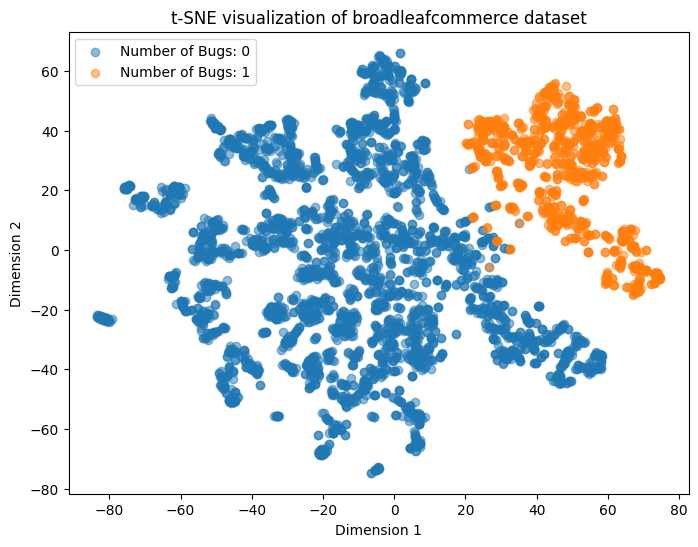

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

train_data = pd.concat([train_features_scaler_df, train_target.reset_index(drop=True)], axis=1)
test_data = pd.concat([test_features_scaler_df, test_target.reset_index(drop=True)], axis=1) #test_target.reset_index(drop=True)
all_data = pd.concat([train_data, test_data], axis=0)

tsne_data = TSNE(n_components=2, random_state=0).fit_transform(all_data)
plt.figure(figsize=(8, 6))
for n_bugs in range(2):
    plt.scatter(tsne_data[all_data['Number of Bugs'] == n_bugs, 0], tsne_data[all_data['Number of Bugs'] == n_bugs, 1], label=f'Number of Bugs: {n_bugs}', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title(f't-SNE visualization of {p} dataset')
plt.legend()
import matplotlib.pyplot as plt
from google.colab import files
plt.savefig(f"{p}.png", dpi=1000)
files.download(f"{p}.png")
plt.show()

In [ ]:
test_target.to_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv",header="Number of Bugs", index=False)
test_features_scaler_df.to_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv", index=False)

train_target.to_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-train-target-method.csv",header="Number of Bugs", index=False)
train_features_scaler_df.to_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-train-features-method.csv", index=False)

### Resampling the instanses using Random Over Sampling (ROS)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
resample_train_features, resample_train_target = ros.fit_resample(train_features_scaler_df, train_target.reset_index(drop=True))
resample_test_features, resample_test_target = ros.fit_resample(test_features_scaler_df, test_target.reset_index(drop=True))

resample_train_target.to_csv(f"drive/MyDrive/csv/subtract-{p}/resample-subtract-{p}-train-target-method.csv",header="Number of Bugs", index=False)
resample_train_features.to_csv(f"drive/MyDrive/csv/subtract-{p}/resample-subtract-{p}-train-features-method.csv", index=False)
resample_test_target.to_csv(f"drive/MyDrive/csv/subtract-{p}/resample-subtract-{p}-test-target-method.csv",header="Number of Bugs", index=False)
resample_test_features.to_csv(f"drive/MyDrive/csv/subtract-{p}/resample-subtract-{p}-test-features-method.csv", index=False)

0    6986
1    6986
Name: Number of Bugs, dtype: int64


<Axes: >

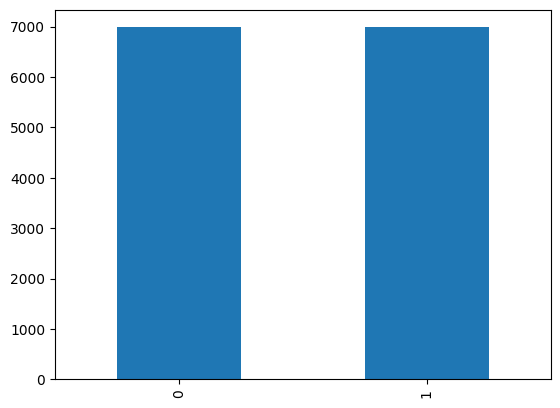

In [ ]:
print(resample_train_target.value_counts())
resample_train_target.value_counts().plot(kind="bar")

#End of preprocessing

# Proposed model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import *
import numpy as np
from sklearn.manifold import TSNE
import tensorflow as tf
import tensorflow_addons as tfa
import time
from statistics import mean
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


###define confusion matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

    ax.xaxis.set_ticklabels(['non-faulty', 'faulty'])
    ax.yaxis.set_ticklabels(['non-faulty', 'faulty'])

    # plt.savefig(f"cm-{p}.png", dpi=600)
    # files.download(f"cm-{p}.png")
    plt.show()

### define metrics to measure training performance

In [ ]:
prec = tf.metrics.Precision(name='precision')
recall = tf.metrics.Recall(name='recall')
f1 = tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5)
accuracy = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)

### details of dataset

In [ ]:
p = 'broadleafcommerce' # name of project p

mode = 'scaler'
state = 'before'

train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

neg = train_target[train_target==0].count()[0] + test_target[test_target==0].count()[0]
pos = train_target[train_target==1].count()[0] + test_target[test_target==1].count()[0]
total = neg+pos

print(f'Total number of instances {state} prep: {total}')
print(f'faulty: {pos}')
print(f'non-faulty: {neg}')
if state == 'before':
  print(f'faulty ratio: {(pos/total)*100: .2f}')
  print(f'Imb ratio: {(neg/pos): .2f}')
  print(f'# software metrics: {train_features.shape[1]}')
print('______________________________________________')

mode = 'resample'
state = 'after'

train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

neg = train_target[train_target==0].count()[0] + test_target[test_target==0].count()[0]
pos = train_target[train_target==1].count()[0] + test_target[test_target==1].count()[0]
total = neg+pos

print(f'Total number of instances {state} prep: {total}')
print(f'faulty: {pos}')
print(f'non-faulty: {neg}')

Total number of instances before prep: 4709
faulty: 1025
non-faulty: 3684
faulty ratio:  21.77
Imb ratio:  3.59
# software metrics: 61
______________________________________________
Total number of instances after prep: 6824
faulty: 3140
non-faulty: 3684


### Computing the weight of classes on the unsampled data

In [ ]:
p = 'broadleafcommerce'
mode = 'scaler'
train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

neg = train_target[train_target==0].count()[0]
pos = train_target[train_target==1].count()[0]
total = neg + pos
print('Total Examples: {}\n'.format(total))
print('Positive: {} ({:.2f}% of total)\n'.format(pos, 100 * pos / total))
print('Negative: {} ({:.2f}% of total)\n'.format(neg, 100 * neg / total))

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

class_weight = {0: weight_for_0, 1: weight_for_1}

Total Examples: 3767

Positive: 826 (21.93% of total)

Negative: 2941 (78.07% of total)

Weight for class 0: 0.64
Weight for class 1: 2.28


# Building DNN model
* DNN-1 - DNN-7

In [ ]:
p = 'broadleafcommerce'
mode = 'resample' #resample, scaler

#train
train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")

#test
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

In [ ]:
train_features.head(2)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Java Logging Rules,Migration Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
0,0.398667,0.387179,0.371308,0.058824,0.00831,0.040816,0.465517,0.48,0.141361,0.125654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.461333,0.576603,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_target.shape

(5882, 1)

## Training DNN-3 with initial parameters

In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()
import random
random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)

num_epochs = 100
batch_size = 256
learning_rate = 0.01
dropout_rate = 0.2

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(train_features.shape[1], 1)), # utilizing 64 filters in each conv layer (DNN-2)
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'), # employing 2d-convs (DNN-7) instead of 1d-convs
    # tf.keras.layers.Conv1D(filters=15, kernel_size=3, padding='same', activation='relu'), # including additional conv layer (DNN-6)
    tf.keras.layers.MaxPooling1D(pool_size=2), # including maxpooling layer (DNN-3)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate), # exclude dropout (DNN-4)
    tf.keras.layers.Dense(1, activation='sigmoid')])
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[f1, prec, recall, accuracy])
start_time = time.time()
history = model.fit(np.expand_dims(train_features, axis=2), train_target, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, shuffle=True, verbose=0) # class_weight=class_weight (DNN-5)
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_nn = model.predict(np.expand_dims(test_features, axis=2))
end_time = time.time()
testing_time = end_time - start_time

pred_nn = ((y_pred_nn>0.5).astype(int))[:,0]
cm = confusion_matrix(test_target, pred_nn)
print(cm)
print(classification_report(test_target, pred_nn, zero_division=0))

TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 61, 32)            128       
                                                                 
 conv1d_13 (Conv1D)          (None, 61, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 30, 32)            0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 960)               0         
                                                                 
 dense_12 (Dense)            (None, 16)                15376     
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                      

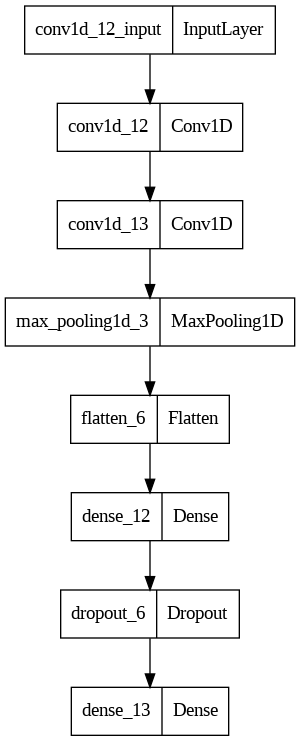

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

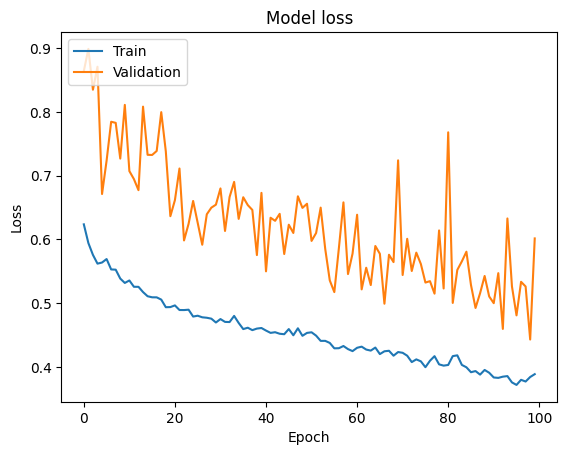

In [ ]:
# import matplotlib.pyplot as plt
# from google.colab import files
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
# plt.savefig(f"loss-{p}-1D.png", dpi=600)
# files.download(f"loss-{p}-1D.png")
plt.show()

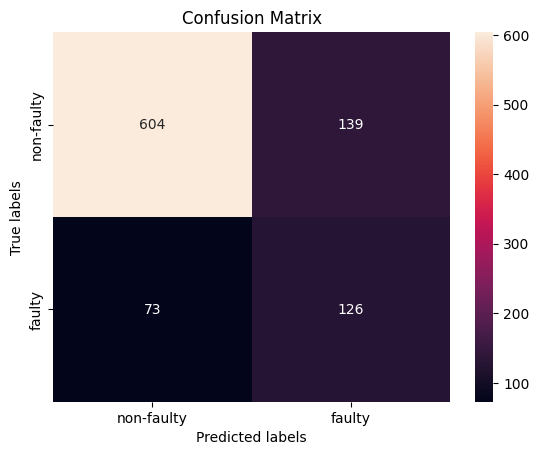

In [ ]:
plot_confusion_matrix(test_target, pred_nn)

## Tuning of DNN-3 utilizing the optuna framework

In [ ]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# ceylon-ide-eclipse, broadleafcommerce, hazelcast, elasticsearch,
# mapdb, netty, orientdb, neo4j, titan, mcmmo, android, antlr4, junit, mct, oryx

In [ ]:
p = 'broadleafcommerce'
mode = 'resample' #resample, scaler

#train
train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")

#test
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    num_epochs = trial.suggest_int('num_epochs', 32, 500)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256, 512])
    # learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1, step=0.0001, log=False) # step=0.0001, log=False
    learning_rate = trial.suggest_categorical('learning_rate', [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.5, step=0.1)

    # kernel_size = trial.suggest_categorical('kernel_size', [(1, 1), (3, 3), (5, 5)])

    # import tensorflow as tf
    # tf.keras.backend.clear_session()
    import random
    random.seed(42)
    import tensorflow as tf
    tf.random.set_seed(42)
    import numpy as np
    np.random.seed(42)
    # Build the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(train_features.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[f1, prec, recall, accuracy])
    history = model.fit(np.expand_dims(train_features, axis=2), train_target, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, shuffle=True, verbose=0)

    if history.history['val_f1_score'][-1]==0.0000e+00 or history.history['val_precision'][-1]==0.0000e+00 or history.history['val_recall'][-1]==0.0000e+00 or history.history['f1_score'][-1]==0.0000e+00 or history.history['precision'][-1]==0.0000e+00 or history.history['recall'][-1]==0.0000e+00:
      return +1e9  # Set a large negative value for models with zero F1 score
    if history.history['val_f1_score'][-1] <= 0.1 or history.history['val_precision'][-1] <= 0.1 or history.history['val_recall'][-1] <= 0.1:
      return +1e9  # Set a large negative value for models with zero F1 score

    y_pred = model.predict(np.expand_dims(test_features, axis=2))
    pred = ((y_pred > 0.5).astype(int))[:, 0]
    cm = confusion_matrix(test_target, pred)
    TP, TN, FP, FN = cm[0][0], cm[1][1], cm[0][1], cm[1][0]
    Pr, Rc, acc = TP / (TP + FP), TP / (TP + FN), (TP + TN) / (TP + FP + FN + TN)
    F1 = 2 * (Pr * Rc) / (Pr + Rc)
    return -F1  # Return the negative F1-score as the value to minimize


study = optuna.create_study(direction='minimize')  # Define the optimization direction as 'minimize'

n_trials = 50  # Number of optimization trials

study.optimize(objective, n_trials=n_trials)  # Run the optimization

# Print the best hyperparameters and the best value achieved
best_params = study.best_params
best_value = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Value (Negative F1-score):", best_value)

### build a dictionary of best params obtained by optuna

In [ ]:
params_dict = {}

params_dict['ceylon-ide-eclipse'] = {}
params_dict['ceylon-ide-eclipse']['epochs'] = 125
params_dict['ceylon-ide-eclipse']['batch_size'] = 32
params_dict['ceylon-ide-eclipse']['lr'] = 0.01
params_dict['ceylon-ide-eclipse']['dropout'] = 0.4

params_dict['broadleafcommerce'] = {}
params_dict['broadleafcommerce']['epochs'] = 286
params_dict['broadleafcommerce']['batch_size'] = 128
params_dict['broadleafcommerce']['lr'] = 0.002
params_dict['broadleafcommerce']['dropout'] = 0.3

params_dict['hazelcast'] = {}
params_dict['hazelcast']['epochs'] = 313
params_dict['hazelcast']['batch_size'] = 32
params_dict['hazelcast']['lr'] = 0.0001
params_dict['hazelcast']['dropout'] = 0.3

params_dict['elasticsearch'] = {}
params_dict['elasticsearch']['epochs'] = 464
params_dict['elasticsearch']['batch_size'] = 32
params_dict['elasticsearch']['lr'] = 0.004
params_dict['elasticsearch']['dropout'] = 0.1

params_dict['mapdb'] = {}
params_dict['mapdb']['epochs'] = 464
params_dict['mapdb']['batch_size'] = 256
params_dict['mapdb']['lr'] = 0.0009
params_dict['mapdb']['dropout'] = 0.4

params_dict['netty'] = {}
params_dict['netty']['epochs'] = 378
params_dict['netty']['batch_size'] = 512
params_dict['netty']['lr'] = 0.001
params_dict['netty']['dropout'] = 0.2

params_dict['orientdb'] = {}
params_dict['orientdb']['epochs'] = 492
params_dict['orientdb']['batch_size'] = 32
params_dict['orientdb']['lr'] = 0.0004
params_dict['orientdb']['dropout'] = 0.5

params_dict['neo4j'] = {}
params_dict['neo4j']['epochs'] = 177
params_dict['neo4j']['batch_size'] = 64
params_dict['neo4j']['lr'] = 0.001
params_dict['neo4j']['dropout'] = 0.5

params_dict['titan'] = {}
params_dict['titan']['epochs'] = 142
params_dict['titan']['batch_size'] = 512
params_dict['titan']['lr'] = 0.009
params_dict['titan']['dropout'] = 0.5

params_dict['mcmmo'] = {}
params_dict['mcmmo']['epochs'] = 288
params_dict['mcmmo']['batch_size'] = 64
params_dict['mcmmo']['lr'] = 0.004
params_dict['mcmmo']['dropout'] = 0.0

params_dict['android'] = {}
params_dict['android']['epochs'] = 433
params_dict['android']['batch_size'] = 512
params_dict['android']['lr'] = 0.08
params_dict['android']['dropout'] = 0.0

params_dict['antlr4'] = {}
params_dict['antlr4']['epochs'] = 426
params_dict['antlr4']['batch_size'] = 128
params_dict['antlr4']['lr'] = 0.001
params_dict['antlr4']['dropout'] = 0.2

params_dict['junit'] = {}
params_dict['junit']['epochs'] = 230
params_dict['junit']['batch_size'] = 64
params_dict['junit']['lr'] = 0.0004
params_dict['junit']['dropout'] = 0.1

params_dict['mct'] = {}
params_dict['mct']['epochs'] = 59
params_dict['mct']['batch_size'] = 32
params_dict['mct']['lr'] = 0.009
params_dict['mct']['dropout'] = 0.4

params_dict['oryx'] = {}
params_dict['oryx']['epochs'] = 408
params_dict['oryx']['batch_size'] = 64
params_dict['oryx']['lr'] = 0.008
params_dict['oryx']['dropout'] = 0.3

## Training DNN-3 with the best parameters

In [ ]:
p = 'broadleafcommerce'
mode = 'resample' #resample, scaler

#train
train_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-target-method.csv")
train_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/{mode}-subtract-{p}-train-features-method.csv")

#test
test_target = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-target-method.csv")
test_features = pd.read_csv(f"drive/MyDrive/csv/subtract-{p}/scaler-subtract-{p}-test-features-method.csv")

In [ ]:
acc_kernel = []
f1_kernel = []
train_kernel = []
test_kernel = []

In [ ]:
import random
random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)

num_epochs = params_dict[p]['epochs']
batch_size = params_dict[p]['batch_size']
learning_rate = params_dict[p]['lr']
dropout_rate = params_dict[p]['dropout']

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(train_features.shape[1], 1)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')])
print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[f1, prec, recall, accuracy])
start_time = time.time()
history = model.fit(np.expand_dims(train_features, axis=2), train_target, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, shuffle=True, verbose=0) # class_weight=class_weight
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_nn = model.predict(np.expand_dims(test_features, axis=2))
end_time = time.time()
testing_time = end_time - start_time

pred_nn = ((y_pred_nn>0.5).astype(int))[:,0]
cm = confusion_matrix(test_target, pred_nn)
print(cm)
print(classification_report(test_target, pred_nn, zero_division=0))

TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 61, 32)            128       
                                                                 
 conv1d_15 (Conv1D)          (None, 61, 32)            3104      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 30, 32)            0         
 g1D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 960)               0         
                                                                 
 dense_14 (Dense)            (None, 16)                15376     
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                      

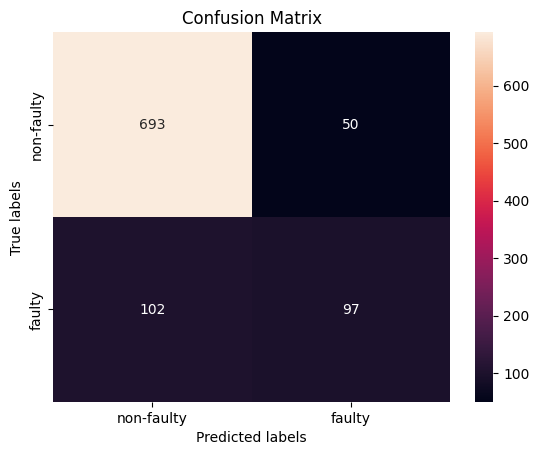

In [ ]:
plot_confusion_matrix(test_target, pred_nn)

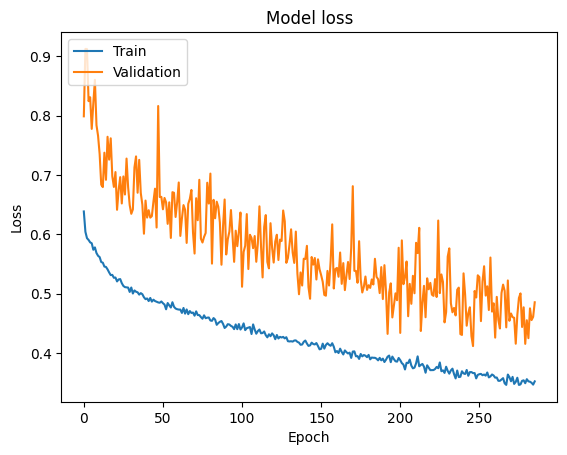

In [ ]:
# import matplotlib.pyplot as plt
# from google.colab import files
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
# plt.savefig(f"loss-{p}-1D.png", dpi=600)
# files.download(f"loss-{p}-1D.png")
plt.show()

### Visualization of the filters used in the convolutional layers

* Filters and their outputs in the first convolutional layer



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

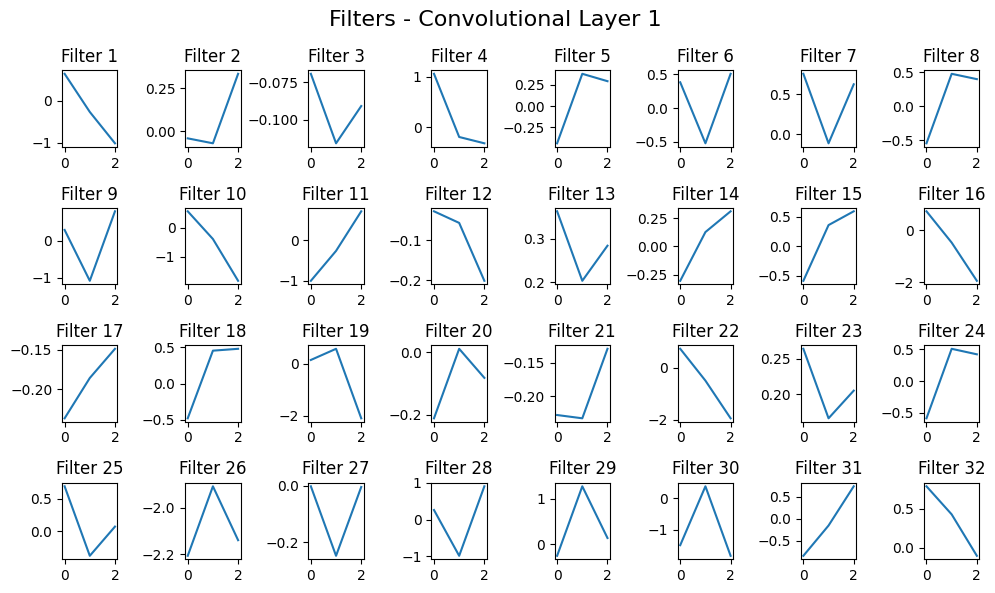

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

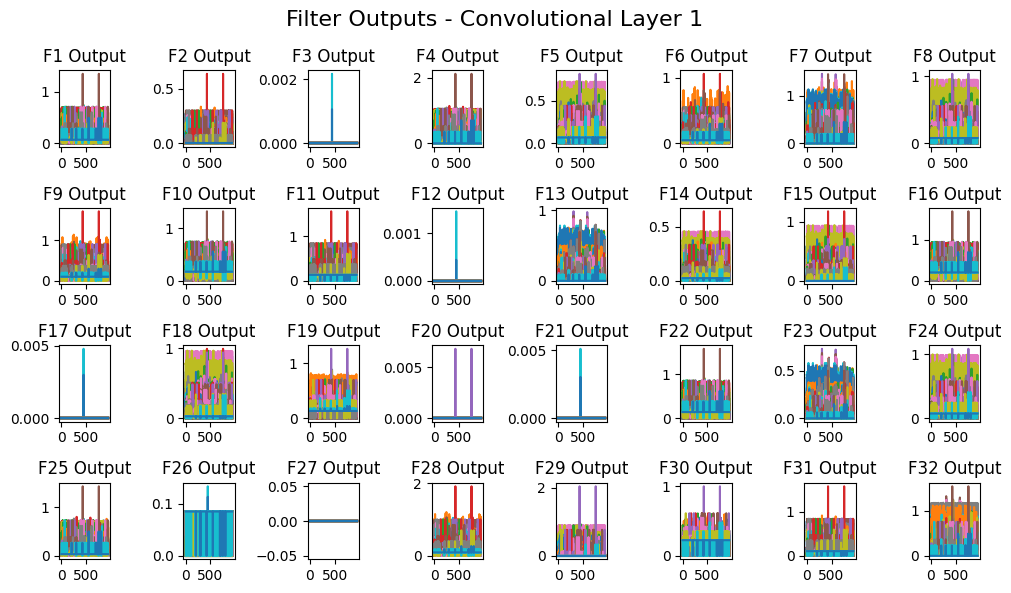

In [ ]:
# Get the weights of the convolutional layers
conv1_weights = model.layers[0].get_weights()[0]

# Visualize the filters in the first convolutional layer
plt.figure(figsize=(10, 6))
for i in range(conv1_weights.shape[2]):
    plt.subplot(4, 8, i+1)
    plt.plot(conv1_weights[:, :, i].squeeze())
    plt.title(f'Filter {i+1}')
plt.suptitle('Filters - Convolutional Layer 1', fontsize=16)
plt.tight_layout()
from google.colab import files
plt.savefig("Filters-Conv1.png", dpi=1000)
files.download("Filters-Conv1.png")
plt.show()

# Visualize the filter outputs on a sample input
sample_input = np.expand_dims(test_features, axis=2)
conv1_output = model.layers[0](sample_input)

plt.figure(figsize=(10, 6))
for i in range(conv1_output.shape[2]):
    plt.subplot(4, 8, i+1)
    plt.plot(conv1_output[:, :, i])
    plt.title(f'F{i+1} Output')
plt.suptitle('Filter Outputs - Convolutional Layer 1', fontsize=16)
plt.tight_layout()
from google.colab import files
plt.savefig("Output-Filters-Conv1.png", dpi=1000)
files.download("Output-Filters-Conv1.png")
plt.show()

#### Select a subset of filters and their corresponding output in fisrt conv layer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

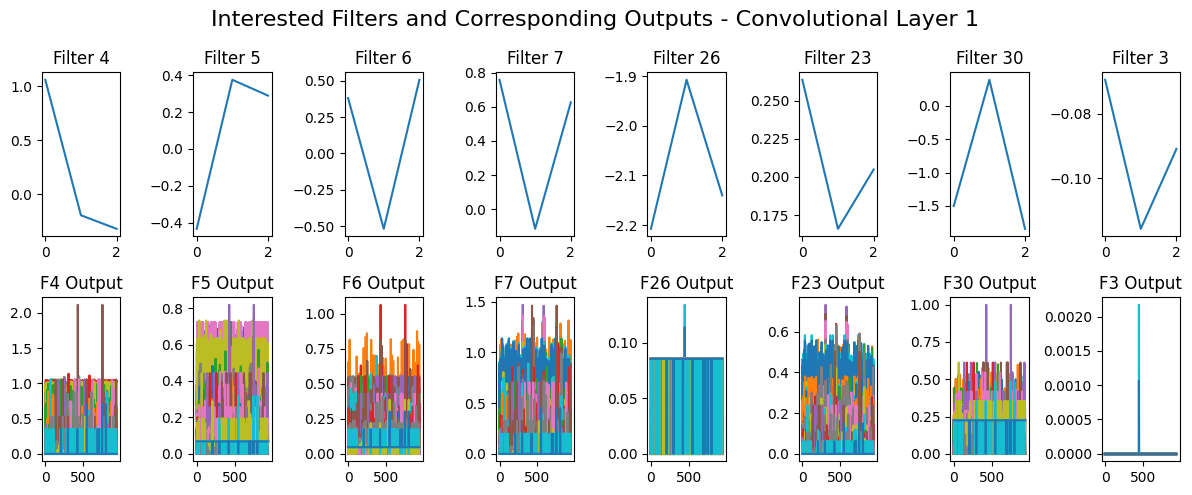

In [ ]:
# Get the weights of the convolutional layers
conv1_weights = model.layers[0].get_weights()[0]

# Visualize the filter outputs on a sample input
sample_input = np.expand_dims(test_features, axis=2)
conv1_output = model.layers[0](sample_input)

# Define the filter numbers and their outputs of interest
interested_filters = [3, 4, 5, 6, 25, 22, 29, 2]
num_filters = len(interested_filters)

# Visualize the filters and their corresponding outputs in the first convolutional layer
plt.figure(figsize=(12, 5))
for i, filter_idx in enumerate(interested_filters):
    # Plot the interested filter
    plt.subplot(2, num_filters, i+1)
    plt.plot(conv1_weights[:, :, filter_idx].squeeze())
    plt.title(f'Filter {filter_idx+1}')

    # Plot the corresponding output
    plt.subplot(2, num_filters, num_filters+i+1)
    plt.plot(conv1_output[:, :, filter_idx])
    plt.title(f'F{filter_idx+1} Output')

plt.suptitle('Interested Filters and Corresponding Outputs - Convolutional Layer 1', fontsize=16)
plt.tight_layout()
plt.savefig("Output-Filters-Conv1-selected.png", dpi=1000)
files.download("Output-Filters-Conv1-selected.png")
plt.show()

####Plot the 8th filter and its output (first conv layer)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

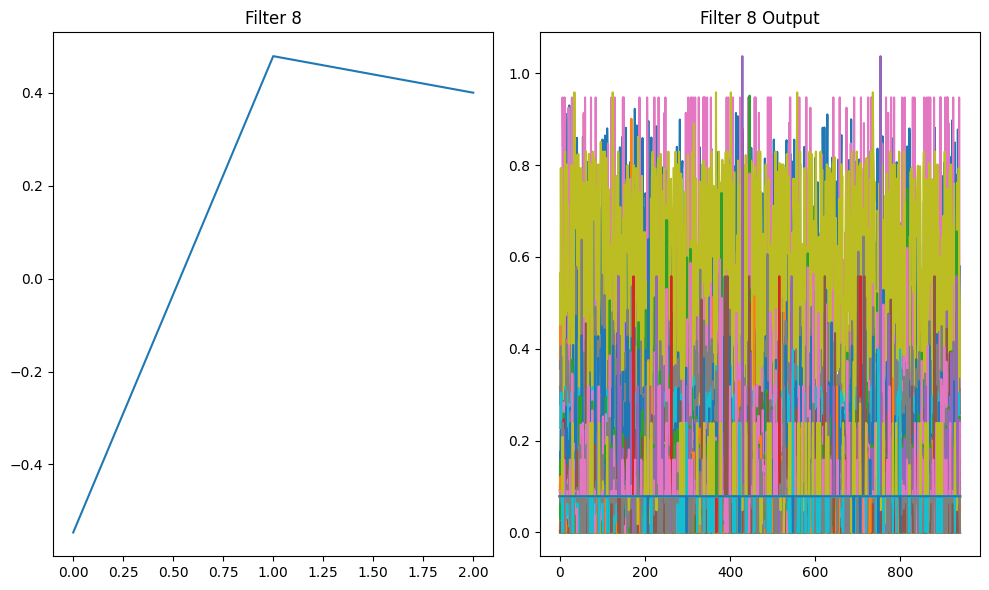

In [ ]:
# from google.colab import files
i = 8
conv1_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(conv1_weights[:, :, i-1].squeeze())
plt.title(f"Filter {i}")
plt.subplot(1, 2, 2)
plt.plot(conv1_output[:, :, i-1])
plt.title(f"Filter {i} Output")
plt.tight_layout()
# plt.savefig(f"Filter{i}.png", dpi=1000)
# files.download(f"Filter{i}.png")
plt.show()

* Filters and their outputs in the second convolutional layer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

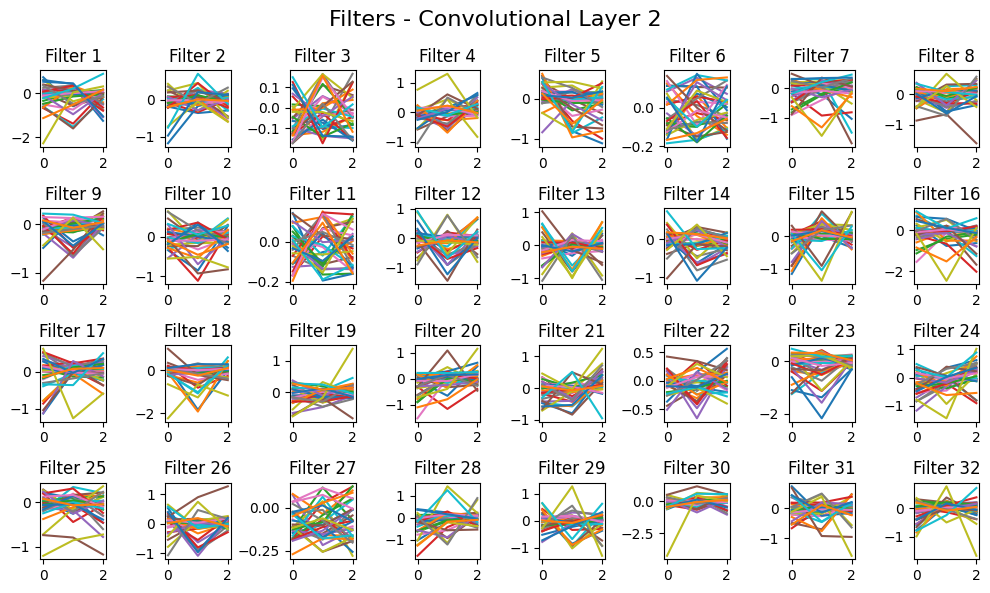

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

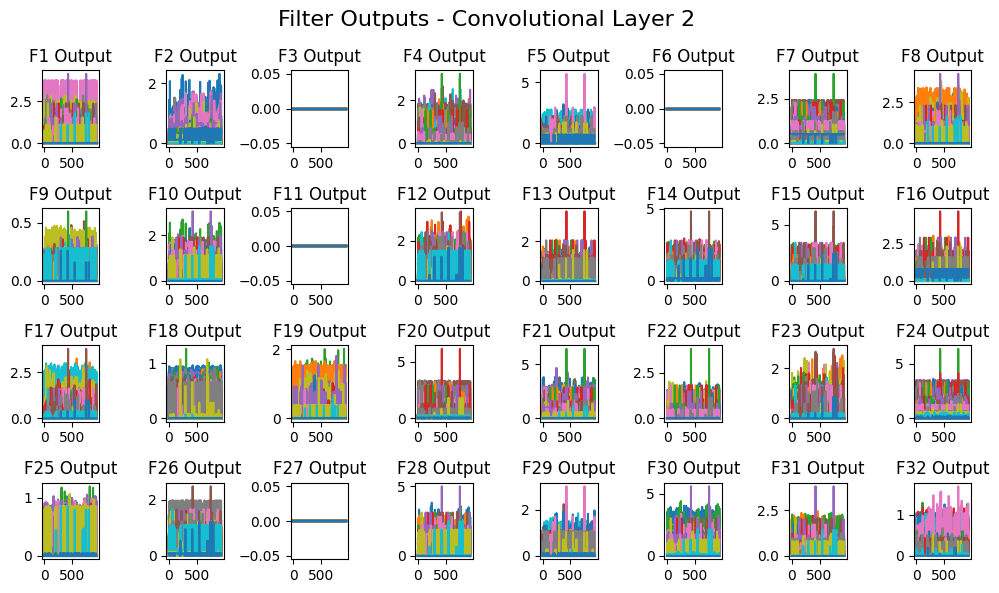

In [ ]:
# Get the weights of the convolutional layers
conv2_weights = model.layers[1].get_weights()[0]

# Visualize the filters in the second convolutional layer
plt.figure(figsize=(10, 6))
for i in range(conv2_weights.shape[2]):
    plt.subplot(4, 8, i+1)
    plt.plot(conv2_weights[:, :, i].squeeze())
    plt.title(f'Filter {i+1}')
plt.suptitle('Filters - Convolutional Layer 2', fontsize=16)
plt.tight_layout()
from google.colab import files
plt.savefig("Filters-Conv2.png", dpi=1000)
files.download("Filters-Conv2.png")
plt.show()

conv2_output = model.layers[1](conv1_output)

plt.figure(figsize=(10, 6))
for i in range(conv2_output.shape[2]):
    plt.subplot(4, 8, i+1)
    plt.plot(conv2_output[:, :, i])
    plt.title(f'F{i+1} Output')
plt.suptitle('Filter Outputs - Convolutional Layer 2', fontsize=16)
plt.tight_layout()
# plt.savefig("Output-Filters-Conv2.png", dpi=1000)
# files.download("Output-Filters-Conv2.png")
plt.show()

#### Select a subset of filters and their corresponding output in second conv layer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

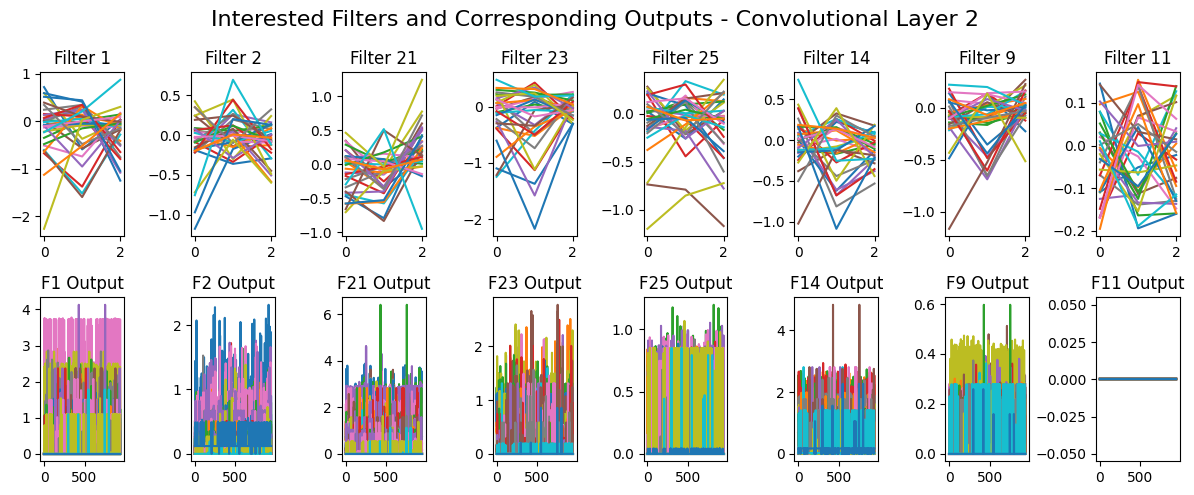

In [ ]:
# Get the weights of the convolutional layers
conv2_weights = model.layers[1].get_weights()[0]
conv2_output = model.layers[1](conv1_output)

# Define the filter numbers and their outputs of interest
interested_filters = [0, 1, 20, 22, 24, 13, 8, 10]
num_filters = len(interested_filters)

# Visualize the filters and their corresponding outputs in the second convolutional layer
plt.figure(figsize=(12, 5))
for i, filter_idx in enumerate(interested_filters):
    # Plot the interested filter
    plt.subplot(2, num_filters, i+1)
    plt.plot(conv2_weights[:, :, filter_idx].squeeze())
    plt.title(f'Filter {filter_idx+1}')

    # Plot the corresponding output
    plt.subplot(2, num_filters, num_filters+i+1)
    plt.plot(conv2_output[:, :, filter_idx])
    plt.title(f'F{filter_idx+1} Output')

plt.suptitle('Interested Filters and Corresponding Outputs - Convolutional Layer 2', fontsize=16)
plt.tight_layout()
plt.savefig("Output-Filters-Conv2-selected.png", dpi=1000)
files.download("Output-Filters-Conv2-selected.png")
plt.show()

####Plot the second filter and its output (second conv layer)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

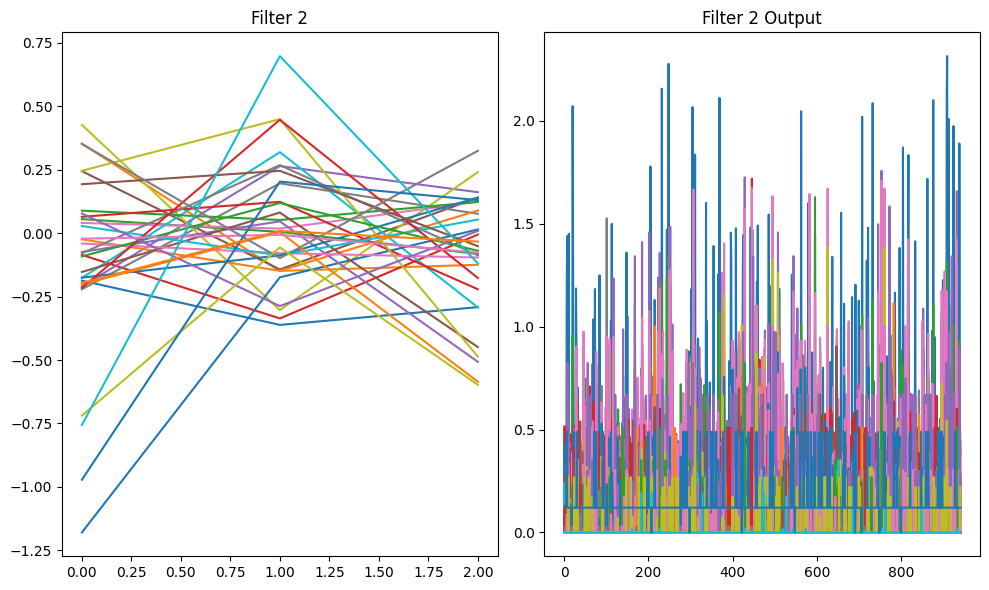

In [ ]:
# from google.colab import files
i = 2
conv2_weights = model.layers[1].get_weights()[0]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(conv2_weights[:, :, i-1].squeeze())
plt.title(f"Filter {i}")
plt.subplot(1, 2, 2)
plt.plot(conv2_output[:, :, i-1])
plt.title(f"Filter {i} Output")
plt.tight_layout()
plt.savefig(f"Filter{i}.png", dpi=1000)
files.download(f"Filter{i}.png")
plt.show()

### Effect of kernel size on DNN-3

In [ ]:
acc_kernel.append(acc)
f1_kernel.append(F1)
train_kernel.append(training_time)
test_kernel.append(testing_time)
print(acc_kernel)
print(f1_kernel)
print(train_kernel)
print(test_kernel)

[0.713230168688136, 0.666262319939348, 0.5382775119617225, 0.8259023354564756, 0.7628635346756152, 0.7465753424657534, 0.7579617834394905, 0.7088607594936709, 0.7230769230769231, 0.8928571428571429, 0.8172043010752689, 0.7619047619047619, 0.8888888888888888, 0.6950767601905771, 0.7532005689900427]
[0.8106067581254027, 0.7778338548501059, 0.6497277676950998, 0.8932291666666666, 0.8493462194428653, 0.827906976744186, 0.8515625, 0.7737704918032787, 0.8392857142857142, 0.9383561643835617, 0.8874172185430463, 0.8571428571428572, 0.9370629370629371, 0.7639344262295082, 0.8444643657552667]
[4411.069782972336, 2664.931747674942, 144.3965458869934, 264.67204332351685, 625.7692160606384, 123.026038646698, 44.15102553367615, 94.88497352600098, 84.40033745765686, 145.15715718269348, 85.66413950920105, 13.152482032775879, 144.3690004348755, 1587.5358254909515, 326.9387049674988]
[1.1679270267486572, 1.514970064163208, 0.21411967277526855, 0.40117549896240234, 0.8168988227844238, 0.21527695655822754

In [ ]:
len(acc_kernel)

15

#### Calculate the mean value for 15 projects over kernel size

In [ ]:
print(f'\nMean Accuracy:  {(mean(acc_kernel)) * 100: .2f}\nMean F1:        {(mean(f1_kernel)) * 100: .2f}')
print(f'Mean Training Time: {(mean(train_kernel)): .4f} sec')
print(f'Mean Testing Time: {(mean(test_kernel)): .4f} sec')


Mean Accuracy:   75.01
Mean F1:         83.34
Mean Training Time:  717.3413 sec
Mean Testing Time:  0.4860 sec


#### kernel_size = 1  
Mean_Accuracy = 75.02  
Mean_F1 = 84.31  
Mean_Training_Time = 407.8607   
Mean Testing Time = 0.3701   

#### kernel_size = 2  
Mean Accuracy:   75.99  
Mean F1:         84.80  
Mean Training Time:  490.9783 sec  
Mean Testing Time:  0.4117 sec  

### kernel = 3  
  
Mean Accuracy: 78.98	  
Mean F1: 86.54  
Mean Training Time: 552.2414   
Mean Testing Time:  0.3859



#### kernel = 4  
Mean_Accuracy:   74.84  
Mean_F1:         83.20  
Mean_Training_Time:  570.7291 sec  
Mean_Testing_Time:  0.4258 sec  

###kernel = 5  
  
Mean Accuracy:   75.01  
Mean F1:         83.34  
Mean Training Time:  717.3413 sec  
Mean Testing Time:  0.4860 sec  

### Bar graphs

<ipython-input-63-fd1e8a0fcd65>:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

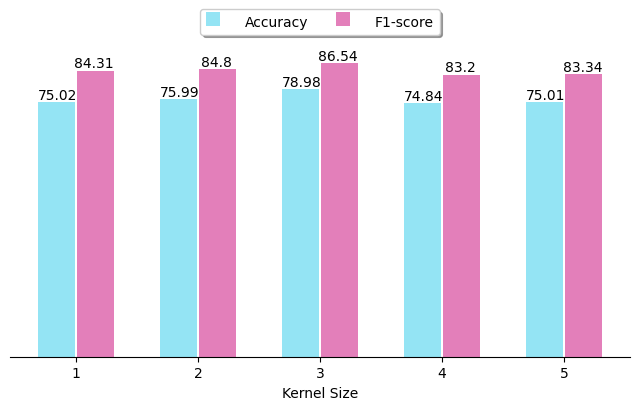

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

data = np.array([[75.02, 75.99, 78.98, 74.84, 75.01],
                [84.31, 84.80, 86.54, 83.20, 83.34]])

labels = ['Accuracy', 'F1-score']
groups = [1, 2, 3, 4, 5]
name = 'performance'

fig, ax =  plt.subplots(figsize =(8, 4))
width = 0.3
x = np.arange(len(groups))
ax.bar(x - width/2 - 0.01, data[0], width, label=labels[0], color='#2acaea', alpha=0.5)
ax.bar(x + width/2 + 0.01, data[1], width, label=labels[1], color='#c90076', alpha=0.5) #e5e4e2 #76A7FA #703593 #BC5679 #871B47 #96A7FB #ca4b9b  c90076

for i, j in enumerate(data):
   for x_val, y_val in zip(x, j):
      ax.annotate(str(y_val), xy=(x_val+i*width-width/2, y_val), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_xlabel('Kernel Size')

legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True)
for handle in legend.legendHandles:
    handle.set_linewidth(0)
    handle.set_height(10)
    handle.set_width(10)

ax.set_yticklabels([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig(f"#kernels-{name}-final.png", dpi=600)
files.download(f"#kernels-{name}-final.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

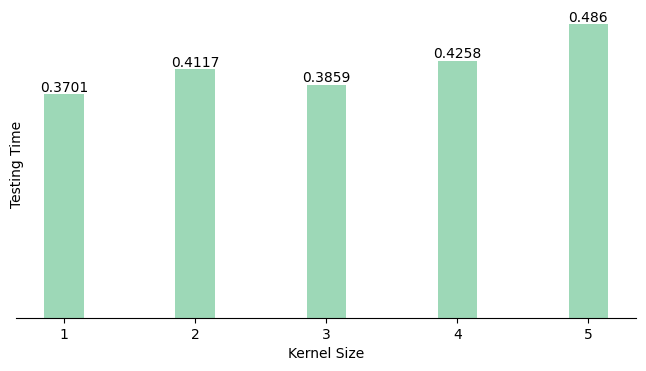

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
train_time = False

if train_time:
  data = np.array([407.8607, 490.9783, 552.2414, 570.7291, 717.3413])
  text = 'Training Time'
  color = '#FFD700'
  name = 'train'

else:
  data = np.array([0.3701, 0.4117, 0.3859, 0.4258, 0.4860])
  text = 'Testing Time'
  color = 'mediumseagreen'
  name = 'test'

groups = [1, 2, 3, 4, 5]
fig, ax = plt.subplots(figsize=(8, 4))
width = 0.3
x = np.arange(len(groups))
ax.bar(x, data, width, label=labels[0], color=color, alpha=0.5)
for x_val, y_val in zip(x, data):
    ax.annotate(str(y_val), xy=(x_val, y_val), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_xlabel('Kernel Size')
ax.set_yticklabels([])
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(-0.01, 0.5, text, transform=ax.transAxes, rotation=90, va='center')
ax.spines['top'].set_visible(False)
plt.savefig(f"#kernels-{name}-final.png", dpi=600)
files.download(f"#kernels-{name}-final.png")
plt.show()

<ipython-input-1-aa479e763125>:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

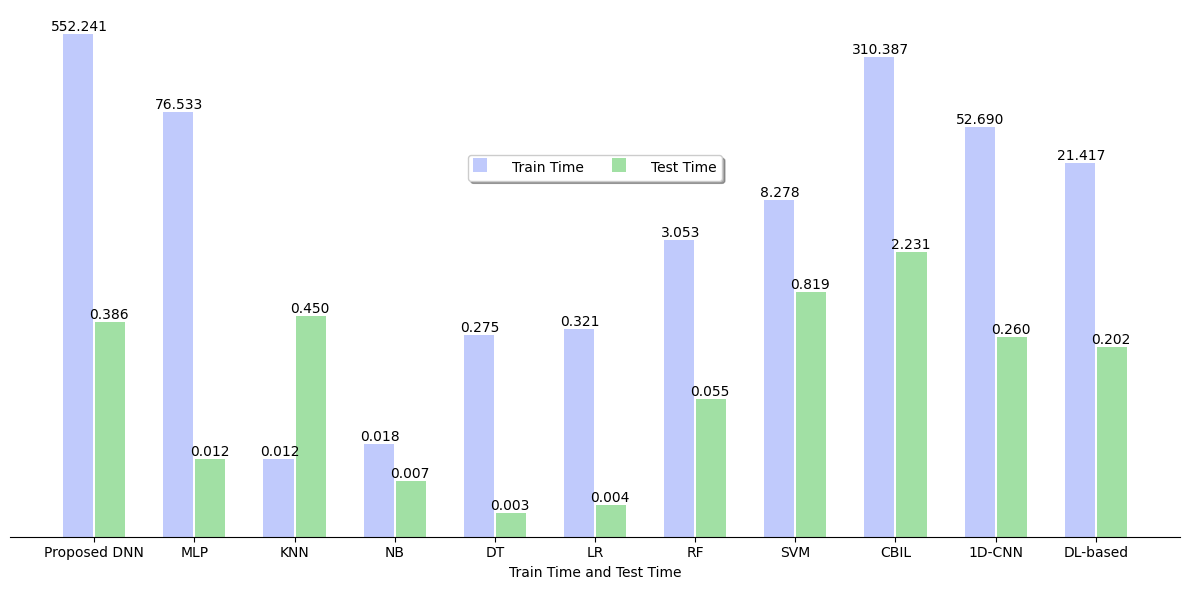

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

data = np.array([[552.2414, 76.5327, 0.0120, 0.0178, 0.2750, 0.3214, 3.0531, 8.2784, 310.3869, 52.6903, 21.4169],
                [0.3859, 0.0122, 0.4503, 0.0070, 0.0031, 0.0038, 0.0551, 0.8187, 2.2309, 0.2598, 0.2018]])

labels = ['Train Time', 'Test Time']
groups = ['Proposed DNN', 'MLP', 'KNN', 'NB', 'DT', 'LR', 'RF', 'SVM', 'CBIL', '1D-CNN', 'DL-based']

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.3
x = np.arange(len(groups))
ax.bar(x - width/2 - 0.01, data[0], width, label=labels[0], color='#96A7FB', alpha=0.6)
ax.bar(x + width/2 + 0.01, data[1], width, label=labels[1], color='#14b31c', alpha=0.4)

for i, j in enumerate(data):
    for x_val, y_val in zip(x, j):
        ax.annotate(f'{y_val:.3f}', xy=(x_val+i*width-width/2, y_val), ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_xlabel('Train Time and Test Time')
ax.set_yscale('log')

legend = ax.legend(loc='center', bbox_to_anchor=(0.5, 0.7), ncol=2, fancybox=True, shadow=True)
for handle in legend.legendHandles:
    handle.set_linewidth(0)
    handle.set_height(10)
    handle.set_width(10)

ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig("#tt-time.png", dpi=600)
files.download("#tt-time.png")
plt.show()

# Machine Learning Algorithms

##MLP Classifier

In [ ]:
import time
from sklearn.neural_network import MLPClassifier # default: max_iter=200
mlp = MLPClassifier(random_state=1, max_iter=1000) # max_iter=1000 for all of the projects #2000 for oryx #3000 for titan, android #2000 for mcmmo, antlr4  --> to avoide Convergence Warning

start_time = time.time()
mlp.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_mlp = mlp.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_mlp)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_mlp, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[578 165]
 [ 57 142]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       743
           1       0.46      0.71      0.56       199

    accuracy                           0.76       942
   macro avg       0.69      0.75      0.70       942
weighted avg       0.82      0.76      0.78       942

Training Time:  62.1007 sec
Testing Time:   0.0119 sec

accuracy:   76.43
F1:         83.89


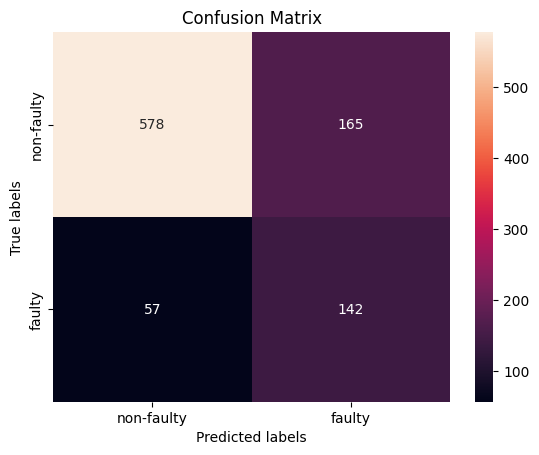

In [ ]:
plot_confusion_matrix(test_target, y_pred_mlp)

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_knn = knn.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_knn)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_knn, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[544 199]
 [ 62 137]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       743
           1       0.41      0.69      0.51       199

    accuracy                           0.72       942
   macro avg       0.65      0.71      0.66       942
weighted avg       0.79      0.72      0.74       942

Training Time:  0.0106 sec
Testing Time:   0.1234 sec

accuracy:   72.29
F1:         80.65


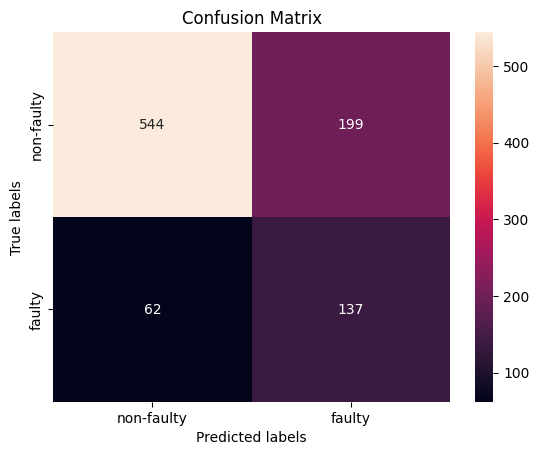

In [ ]:
plot_confusion_matrix(test_target, y_pred_knn)

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

start_time = time.time()
nb.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_nb = nb.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_nb)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_nb, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[  9 734]
 [  3 196]]
              precision    recall  f1-score   support

           0       0.75      0.01      0.02       743
           1       0.21      0.98      0.35       199

    accuracy                           0.22       942
   macro avg       0.48      0.50      0.19       942
weighted avg       0.64      0.22      0.09       942

Training Time:  0.0112 sec
Testing Time:   0.0133 sec

accuracy:   21.76
F1:         2.38


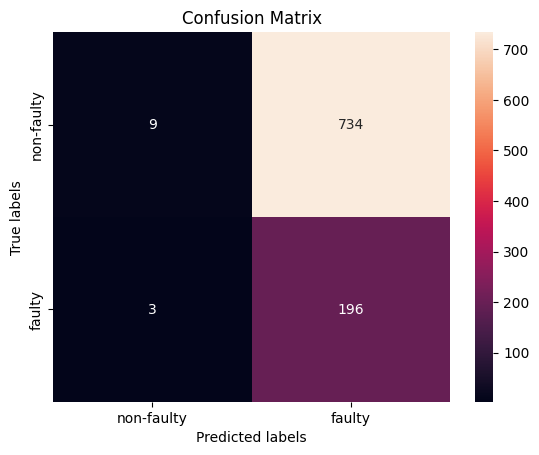

In [ ]:
plot_confusion_matrix(test_target, y_pred_nb)

## Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0) #max_depth=

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(dt, train_features, train_target['Number of Bugs'], cv=5)
average_cv_score = np.mean(cv_scores)

start_time = time.time()
dt.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_dt = dt.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_dt)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_dt, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print("\nCross-Validation Scores:", cv_scores)
print("Average CV Score:", average_cv_score)
print(f'\nTraining Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[646  97]
 [ 88 111]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       743
           1       0.53      0.56      0.55       199

    accuracy                           0.80       942
   macro avg       0.71      0.71      0.71       942
weighted avg       0.81      0.80      0.81       942


Cross-Validation Scores: [0.92608326 0.88785047 0.92346939 0.90986395 0.92431973]
Average CV Score: 0.9143173582092141

Training Time:  0.1284 sec
Testing Time:   0.0024 sec

accuracy:   80.36
F1:         87.47


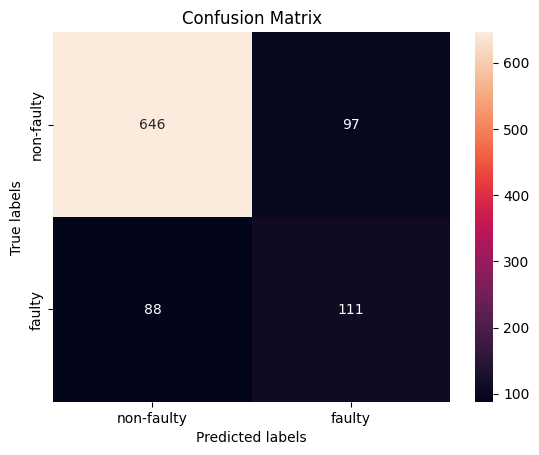

In [ ]:
plot_confusion_matrix(test_target, y_pred_dt)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=1000)

start_time = time.time()
lr.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_lr = lr.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_lr)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_lr, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[461 282]
 [ 46 153]]
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       743
           1       0.35      0.77      0.48       199

    accuracy                           0.65       942
   macro avg       0.63      0.69      0.61       942
weighted avg       0.79      0.65      0.68       942

Training Time:  0.1283 sec
Testing Time:   0.0030 sec

accuracy:   65.18
F1:         73.76


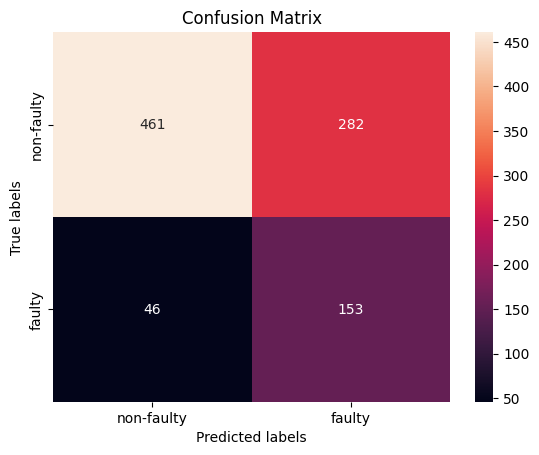

In [ ]:
plot_confusion_matrix(test_target, y_pred_lr)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
rf = RandomForestClassifier(random_state=0) # default: n_estimators=100

start_time = time.time()
rf.fit(train_features, train_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_rf = rf.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_rf)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_rf, zero_division=0))
TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[690  53]
 [ 87 112]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       743
           1       0.68      0.56      0.62       199

    accuracy                           0.85       942
   macro avg       0.78      0.75      0.76       942
weighted avg       0.84      0.85      0.85       942

Training Time:  1.3721 sec
Testing Time:   0.0328 sec

accuracy:   85.14
F1:         90.79


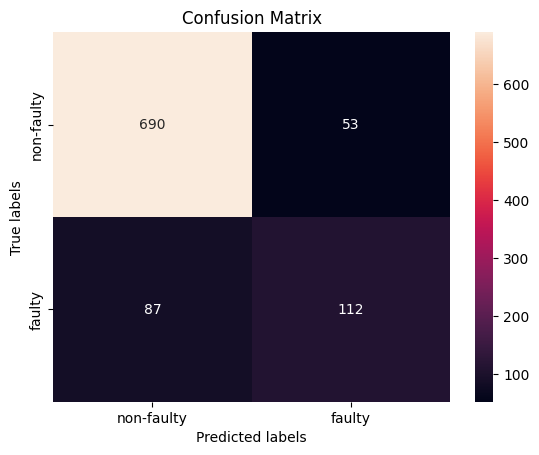

In [ ]:
plot_confusion_matrix(test_target, y_pred_rf)

##SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC() # default setting for all datasets: kernel='rbf', C=1.0  # except: kernel='sigmoid' on the hazelcast and elasticsearch because of F1-score=NaN
batch_size = 13000  # 12000: hazelcast, neo4j # 13000: elasticsearch, ceylon, broadleaf, mapdb, orientdb, mcmmo # 14000: netty # 1000: titan, android, junit, mct # 2000: antlr4, oryx
n_samples = train_features.shape[0]
n_batches = int(np.ceil(n_samples / batch_size))

start_time = time.time()
for batch_idx in range(n_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, n_samples)
    batch_features = train_features[start_idx:end_idx]
    batch_target = train_target[start_idx:end_idx]
    svm.fit(batch_features, batch_target['Number of Bugs'])
end_time = time.time()
training_time = end_time - start_time

start_time = time.time()
y_pred_svm = svm.predict(test_features)
end_time = time.time()
testing_time = end_time - start_time

cm = confusion_matrix(test_target['Number of Bugs'], y_pred_svm)
print(cm)
print(classification_report(test_target['Number of Bugs'], y_pred_svm, zero_division=0))

TP, TN, FP, FN = cm[0][0], cm[1][1],cm[0][1], cm[1][0]
Pr, Rc, acc = TP/(TP+FP), TP/(TP+FN), (TP+TN)/(TP+FP+FN+TN)
F1 = 2*(Pr*Rc)/(Pr+Rc)
print(f'Training Time: {training_time: .4f} sec')
print(f'Testing Time:  {testing_time: .4f} sec')
print(f'\naccuracy:  {acc * 100: .2f}\nF1:        {F1 * 100: .2f}')

[[505 238]
 [ 48 151]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       743
           1       0.39      0.76      0.51       199

    accuracy                           0.70       942
   macro avg       0.65      0.72      0.65       942
weighted avg       0.80      0.70      0.72       942

Training Time:  3.5360 sec
Testing Time:   2.1720 sec

accuracy:   69.64
F1:         77.93


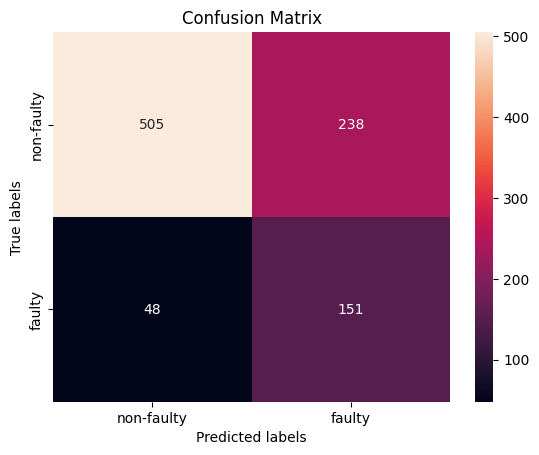

In [ ]:
plot_confusion_matrix(test_target, y_pred_svm)